## Checking the signal as it is being played back

This is basically code that already is described in [2_1_SignalAcquisition.ipynb](2_1_SignalAcquisition.ipynb), but this time only the bare necessity to run pylsl to check the stream. 

It is assumed a data stream (of any kind) is already running

In [1]:
import pylsl

In [2]:
streams=pylsl.resolve_streams()

In [3]:
streams

In [4]:
inlet=pylsl.stream_inlet(streams[0])

In [5]:
data, times=inlet.pull_chunk()
print(len(data))

0


Here you should get some data; perhaps you should call it again if there is nothing:

In [6]:
data, times=inlet.pull_chunk()
print(len(data))

301


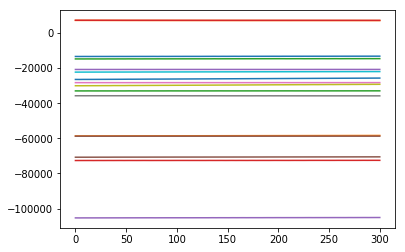

In [8]:
import matplotlib.pyplot as plt

plt.plot(data)

If you can grab some data, the playback (or your device) works

To actually work with the real-time data stream, as mentioned in [2_1_SignalAcquisition.ipynb](2_1_SignalAcquisition.ipynb), it goes like this:

```python
while True:
    data, times = inlet.pull_chunk()
    
    # val = do_some_processing(data)
    
    # send_to_feedback_presentation(val)
```

where do_some_processing can be anything involving calibration data, some ICA or PCA-derived spatial maps, filtering, or any combination thereof depending on your goals.

the send_to_feedback_presentation is the part where you transmit your feature/value that is to be send to the feedback stimulus. Instead of a value, you could also specify markers, times, or any indicator of altered behavior depending on the real-time incoming data

## Addendum - Plotting the datastream in a 'live' Qt window

We need stuff from the [nfb toolbox](https://github.com/nikolaims/nfb) (from the Russians in Moscow) - so we do matlab equivalent of 'addpath' in python

```python
import sys
sys.path.append("/home/rt/nf/nfb")
sys.path.append("/home/rt/nf/nfb/pynfb")
```



In [11]:
import sys
sys.path.append("/home/nfcontrol/nf/nfb")
sys.path.append("/home/nfcontrol/nf/nfb/pynfb")

import time  

In [12]:
import widgets

and from here we grab the signal viewers
As per the instructions in [1_1_CreateRTEnvironment.ipynb](1_1_CreateRTEnvironment.ipynb), we have made a small change in the ipython_config.py file (which is an ipython equivalent of the matlab.m file run by matlab when it starts up) - in order to make the window update nicely. You only have to do it once!

In [13]:
from widgets.signal_viewers import SignalViewer
from widgets.signal_viewers import RawSignalViewer

In [14]:
# we make the window:


# use pylsl to figure out how many channels
inlet_info = inlet.info()
nchans = inlet_info.channel_count()
srate = inlet_info.nominal_srate()

print(nchans)
print(srate)

16
125.0


In [ ]:
# make the RawSignalViewer with that many channels
w=RawSignalViewer(srate,['%d' % i for i in range(nchans)])

In [ ]:
while True:
    
    time.sleep(0.00001)
    data_chunk, times = inlet.pull_chunk()
    
    if data_chunk:
    
        w.update(data_chunk)
        w.show()


/home/rt/miniconda2/envs/rt/lib/python3.6/site-packages/pyqtgraph/graphicsItems/PlotCurveItem.py:131: RuntimeWarning: All-NaN slice encountered
  b = (np.nanmin(d), np.nanmax(d))


this now will plot the data as it is coming in. The Python evaluation is 'stuck' until after the while loop is done (which is: never!). But use the jupyter lab's shortcuts to break out of the loop, with I-I or reset the Kernel with 0-0

So it is (almost) the same as a normal signal viewer, perhaps even less nice with less buttons. However, the main big advantage you have now, is that you can manipulate the data as you see fit.

The data's length/size does vary though. The amount of channels is always nbchan, but the number of timepoints can be 10 samples, 5 samples, or perhaps even 100 samples. Usually, if things run well, the amount of data samples should be consistent

Now that you have the data stream, what to do with it?
Go to [3_1_Strategy.ipynb](3_1_Strategy.ipynb)